# Exploration

Looking at CAM5 IDR against all other Arabidopsis IDRs, using reduced alphabet string search

In [2]:
import pandas as pd

In [2]:
IDRs = pd.read_csv("./data/TAIR10/IDRs.csv", sep='\t')
IDRs["Length"] = IDRs["Sequence"].apply(len)
IDRs.head()

,Entry,Start,End,Sequence,ConfidenceScore,Length
0,A0A0A7EPL0,0,14,MVIPATSRFGFRAEF,"[61.39, 62.26, 63.1, 61.71, 59.13, 59.14, 54.3...",15
1,A0A0A7EPL0,366,846,ENDEDVELVPETTHDHGDPNSFINLGPTVKNPARDENEMETSTQVE...,"[58.84, 45.42, 41.95, 41.11, 41.48, 48.53, 44....",481
2,A0A178VEK7,123,293,DASSSSFNPKSSSSHRLKGKNVKPIRQSSQGFGLVEEEVTVSSSCS...,"[64.46, 63.41, 61.52, 61.63, 60.86, 61.98, 57....",171
3,A0A178WF56,0,70,MAQYHQQHEMKQTMAETQYVTAPPPMGYPVMMKDSPQTVQPPHEGQ...,"[56.81, 55.75, 57.62, 56.91, 59.69, 63.41, 58....",71
4,A0A1I9LMX5,18,242,QTPITTEARSLRKTNDQDHFKAGFTDDFVPTSPGNSPGVGHKKGNV...,"[64.54, 61.41, 67.58, 64.03, 61.82, 58.75, 67....",225


In [3]:
uniprot = pd.read_csv("data/TAIR10/ArabidopsisUniprot.tsv", sep="\t")
uniprot = uniprot[uniprot['AlphaFoldDB'].notnull()] #remove empty AlphaFoldDB entries
uniprot.head()

,Entry,Entry Name,Gene Names,AlphaFoldDB,Protein names,Gene Names (ordered locus),Sequence
0,A0A0A7EPL0,PIAL1_ARATH,PIAL1 EMB3001 At1g08910 F7G19.21,A0A0A7EPL0;,E4 SUMO-protein ligase PIAL1 (EC 2.3.2.-) (Pro...,At1g08910,MVIPATSRFGFRAEFNTKEFQASCISLANEIDAAIGRNEVPGNIQE...
1,A0A178VEK7,DUO1_ARATH,DUO1 MYB125 At3g60460 T8B10.120,A0A178VEK7;,Transcription factor DUO1 (Myb-related protein...,At3g60460,MRKMEAKKEEIKKGPWKAEEDEVLINHVKRYGPRDWSSIRSKGLLQ...
2,A0A178WF56,CSTM3_ARATH,CYSTM3 At1g56060 T6H22.17,A0A178WF56;,Protein CYSTEINE-RICH TRANSMEMBRANE MODULE 3 (...,At1g56060,MAQYHQQHEMKQTMAETQYVTAPPPMGYPVMMKDSPQTVQPPHEGQ...
3,A0A1I9LMX5,PCEP9_ARATH,CEP9 At3g50610 T20E23.210,A0A1I9LMX5;,Precursor of CEP9 (PCEP9) [Cleaved into: C-ter...,At3g50610,MKLLSITLTSIVISMVFYQTPITTEARSLRKTNDQDHFKAGFTDDF...
4,A0A1I9LN01,LAF3_ARATH,LAF3 At3g55850 F27K19.30,A0A1I9LN01;,Protein LONG AFTER FAR-RED 3 (EC 3.5.-.-),At3g55850,MTGWYEFPVMIGFVSAAVFLLISVAYLPLLNDLYWSTLKSLTPPAG...


In [4]:
### Calculate Disorder scores 

In [32]:
four = {"L": "A", "V": "A", "I": "A", "M": "A", "C": "A",
        "A": "B", "G": "B", "S": "B", "T": "B", "P": "B",
        "F": "C", "Y": "C", "W": "C",
        "E": "D", "D": "D", "N": "D", "Q": "D", "K": "D", "R": "D", "H": "D"}

eight = {"L": "A", "V": "A", "I": "A", "M": "A", "C": "A",
         "A": "B", "G": "B",
         "S": "C", "T": "C",
         "P": "D",
         "F": "E", "Y": "E", "W": "E",
         "E": "F", "D": "F", "N": "F", "Q": "F",
         "K": "G", "R": "G",
         "H": "H"}

ten = {"L": "A", "V": "A", "I": "A", "M": "A",
       "C": "B",
       "A": "C",
       "G": "D",
       "S": "E", "T": "E",
       "P": "F",
       "F": "G", "Y": "G", "W": "G",
       "E": "H", "D": "H", "N": "H", "Q": "H",
       "K": "I", "R": "I",
       "H": "J"}

twelve = {"L": "A", "V": "A", "I": "A", "M": "A",
          "C": "B",
          "A": "C",
          "G": "D",
          "S": "E", "T": "E",
          "P": "F",
          "F": "G", "Y": "G",
          "W": "H",
          "E": "I", "Q": "I",
          "D": "J", "N": "J",
          "K": "K", "R": "K",
          "H": "L"}

fifteen = {"L": "A", "V": "A", "I": "A", "M": "A",
           "C": "B",
           "A": "C",
           "G": "D",
           "S": "E",
           "T": "F",
           "P": "G",
           "F": "H", "Y": "H",
           "W": "I",
           "E": "J",
           "Q": "K",
           "D": "L",
           "N": "M",
           "K": "N", "R": "N",
           "H": "O"}

eighteen = {"L": "A", "M": "A",
            "V": "B", "I": "B",
            "C": "C",
            "A": "D",
            "G": "E",
            "S": "F",
            "T": "G",
            "P": "H",
            "F": "I",
            "Y": "J",
            "W": "K",
            "E": "L",
            "D": "M",
            "N": "N",
            "Q": "O",
            "K": "P", 
            "R": "Q",
            "H": "R"}
"""
four     - [(LVIMC), (AGSTP), (FYW), (EDNQKRH)]
eight    - [(LVIMC), (AG), (ST), (P), (FYW), (EDNQ), (KR), (H)]
ten      - [(LVIM), (C), (A), (G), (ST), (P), (FYW), (EDNQ), (KR), (H)]
twelve   - [(LVIM), (C), (A), (G), (ST), (P), (FY), (W), (EQ), (DN), (KR), (H)]
fifteen  - [(LVIM), (C), (A), (G), (S), (T), (P), (FY), (W), (E), (Q), (D), (N), (KR), (H)]
eighteen - [(LM), (VI), (C), (A), (G), (S), (T), (P), (F), (Y), (W), (E), (D), (N), (Q), (K), (R), (H)]
"""

'\nfour     - [(LVIMC), (AGSTP), (FYW), (EDNQKRH)]\neight    - [(LVIMC), (AG), (ST), (P), (FYW), (EDNQ), (KR), (H)]\nten      - [(LVIM), (C), (A), (G), (ST), (P), (FYW), (EDNQ), (KR), (H)]\ntwelve   - [(LVIM), (C), (A), (G), (ST), (P), (FY), (W), (EQ), (DN), (KR), (H)]\nfifteen  - [(LVIM), (C), (A), (G), (S), (T), (P), (FY), (W), (E), (Q), (D), (N), (KR), (H)]\neighteen - [(LM), (VI), (C), (A), (G), (S), (T), (P), (F), (Y), (W), (E), (D), (N), (Q), (K), (R), (H)]\n'

In [30]:
def translate(sequence, reduction_dict):
    return ''.join([reduction_dict.get(res, res) for res in sequence])

def reduce_alphabet(sequence):

    reduced_seq_four = translate(sequence, four)
    reduced_seq_eight = translate(sequence, eight)
    reduced_seq_ten = translate(sequence, ten)
    reduced_seq_twelve = translate(sequence, twelve)
    reduced_seq_fifteen = translate(sequence, fifteen)
    reduced_seq_eighteen = translate(sequence, eighteen)

    return reduced_seq_four, reduced_seq_eight, reduced_seq_ten, reduced_seq_twelve, reduced_seq_fifteen, reduced_seq_eighteen

#IDRs[["Four", "Eight", "Ten", "Twelve", "Fifteen", "Eighteen"]] = IDRs["Sequence"].apply(reduce_alphabet).apply(pd.Series)

In [64]:
#apply on calmodulin sequences
calmodulin_proteins = pd.read_csv("data/TAIR10/CalmodulinProteinsUniprot.tsv", sep="\t")
calmodulin_proteins = calmodulin_proteins[["Entry Name", "Protein names", "Gene Names (ordered locus)", "Sequence"]] 
calmodulin_proteins["Four"], calmodulin_proteins["Eight"], calmodulin_proteins["Ten"], calmodulin_proteins["Twelve"], calmodulin_proteins["Fifteen"], calmodulin_proteins["Eighteen"] = zip(*calmodulin_proteins["Sequence"].apply(reduce_alphabet))

calmodulin_proteins.head()

,Entry Name,Protein names,Gene Names (ordered locus),Sequence,Four,Eight,Ten,Twelve,Fifteen,Eighteen
0,TIC32_ARATH,"Short-chain dehydrogenase TIC 32, chloroplasti...",At4g23430,MWFFGSKGASGFSSRSTAEEVTHGVDGTGLTAIVTGASSGIGVETA...,ACCCBBDBBBBCBBDBBBDDABDBADBBBABBAABBBBBBABADBB...,AEEEBCGBBCBECCGCCBFFACHBAFBCBACBAACBBCCBABAFCB...,AGGGDEIDCEDGEEIEECHHAEJDAHDEDAECAAEDCEEDADAHEC...,AHGGDEKDCEDGEEKEECIIAELDAJDEDAECAAEDCEEDADAIEC...,AIHHDENDCEDHEENEFCJJAFODALDFDAFCAAFDCEEDADAJFC...,AKIIEFPEDFEIFFQFGDLLBGREBMEGEAGDBBGEDFFEBEBLGD...
1,CPSF_ARATH,30-kDa cleavage and polyadenylation specificit...,At1g30460,MEDADGLSFDFEGGLDSGPVQNTASVPVAPPENSSSAAVNVAPTYD...,ADDBDBABCDCDBBADBBBADDBBBABABBBDDBBBBBADABBBCD...,AFFBFBACEFEFBBAFCBDAFFCBCADABDDFFCCCBBAFABDCEF...,AHHCHDAEGHGHDDAHEDFAHHECEAFACFFHHEEECCAHACFEGH...,AIJCJDAEGJGIDDAJEDFAIJECEAFACFFIJEEECCAJACFEGJ...,AJLCLDAEHLHJDDALEDGAKMFCEAGACGGJMEEECCAMACGFHL...,ALMDMEAFIMILEEAMFEHBONGDFBHBDHHLNFFFDDBNBDHGJM...
2,SNX2B_ARATH,Sorting nexin 2B,At5g07120,MMGSENDEESHLHSSKEEMEKLFLREDGDPLTKSNVNGDKSNSNYR...,AABBDDDDDBDADBBDDDADDACADDDBDBABDBDADBDDBDBDCD...,AABCFFFFFCHAHCCGFFAFGAEAGFFBFDACGCFAFBFGCFCFEG...,AADEHHHHHEJAJEEIHHAHIAGAIHHDHFAEIEHAHDHIEHEHGI...,AADEIJJIIELALEEKIIAIKAGAKIJDJFAEKEJAJDJKEJEJGK...,AADEJMLJJEOAOEENJJAJNAHANJLDLGAFNEMAMDLNEMEMHN...,AAEFLNMLLFRARFFPLLALPAIAQLMEMHAGPFNBNEMPFNFNJQ...
3,MYO11_ARATH,Myosin-11 (Myosin XI E) (AtXIE),At1g54560,MRNSGTPVNIIVGSHVWIEDSDVAWIDGLVEKINGQDVEVQATNGK...,ADDBBBBADAAABBDACADDBDABCADBAADDADBDDADADBBDBD...,AGFCBCDAFAAABCHAEAFFCFABEAFBAAFGAFBFFAFAFBCFBG...,AIHEDEFAHAAADEJAGAHHEHACGAHDAAHIAHDHHAHAHCEHDI...,AKJEDEFAJAAADELAHAIJEJACHAJDAAIKAJDIJAIAICEJDK...,ANMEDFGAMAAADEOAIAJLELACIALDAAJNAMDKLAJAKCFMDN...,AQNFEGHBNBBBEFRBKBLMFMBDKBMEABLPBNEOMBLBODGNEP...
4,MYO9_ARATH,Myosin-9 (Myosin XI C) (AtXIC),At1g08730,MVRECFTFLNIFVLHSIGSHVWFEDPEVAWIDGEVEKINGQEVVIQ...,AADDACBCADACAADBABBDACCDDBDABCADBDADDADBDDAAAD...,AAGFAECEAFAEAAHCABCHAEEFFDFABEAFBFAFGAFBFFAAAF...,AAIHBGEGAHAGAAJEADEJAGGHHFHACGAHDHAHIAHDHHAAAH...,AAKIBGEGAJAGAALEADELAHGIJFIACHAJDIAIKAJDIIAAAI...,AANJBHFHAMAHAAOEADEOAIHJLGJACIALDJAJNAMDKJAAAK...,ABQLCIGIANBIBARFBEFRBKILMHLBDKBMELBLPBNEOLBBBO...


In [65]:
CAM5_IDR = "MAAKRSSNSAEYKEKNGRRKSHCRIL"

CAM5_reduced_seq_four, CAM5_reduced_seq_eight, CAM5_reduced_seq_ten, CAM5_reduced_seq_twelve, CAM5_reduced_seq_fifteen, CAM5_reduced_seq_eighteen = reduce_alphabet(CAM5_IDR)

In [27]:
import textdistance

In [66]:
def sliding_window_hamming(str1, str2, window_size=None, step=2):
    if window_size is None:
        window_size = min(len(str1), len(str2))
    if len(str1) <= len(str2):
        target = str2
        query = str1
    else:
        target = str1
        query = str2
    distances = []
    for i in range(0, len(target) - window_size + 1, step):
        window = target[i:i + window_size]
        dist = textdistance.hamming(query, window)
        distances.append((dist, window))
    return sorted(distances)[0][0]  # Return only the minimum distance


In [68]:
#eighteen
calmodulin_proteins["Eighteen Hamming"] = calmodulin_proteins["Eighteen"].apply(lambda x: sliding_window_hamming(CAM5_reduced_seq_eighteen, x, step=1))


<Axes: xlabel='Eighteen Hamming', ylabel='Count'>

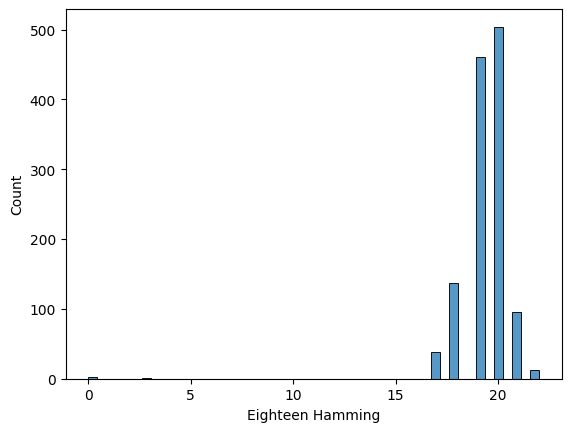

In [71]:
sns.histplot(calmodulin_proteins["Eighteen Hamming"], bins=50)

In [70]:
calmodulin_proteins.sort_values(by="Eighteen Hamming")[:20]

,Entry Name,Protein names,Gene Names (ordered locus),Sequence,Four,Eight,Ten,Twelve,Fifteen,Eighteen,Eighteen Hamming
1069,A0A654EWJ3_ARATH,EF-hand domain-containing protein,NaN,MADQLTDDQISEFKEAFSLFDKDGDGCITTKELGTVMRSLGQNPTE...,ABDDABDDDABDCDDBCBACDDDBDBAABBDDABBAADBABDDBBD...,ABFFACFFFACFEGFBECAEFGFBFBAACCGFABCAAGCABFFDCF...,ACHHAEHHHAEHGIHCGEAGHIHDHDBAEEIHADEAAIEADHHFEH...,ACJIAEJJIAEIGKICGEAGJKJDJDBAEEKIADEAAKEADIJFEI...,ACLKAFLLKAEJHNJCHEAHLNLDLDBAFFNJADFAANEADKMGFJ...,ADMOAGMMOBFLIPLDIFAIMPMEMECBGGPLAEGBAQFAEONHGL...,0
782,F4IVN6_ARATH,Calmodulin 5,At2g27030,MADQLTDDQISEFKEAFSLFDKDGDGCITTKELGTVMRSLGQNPTE...,ABDDABDDDABDCDDBCBACDDDBDBAABBDDABBAADBABDDBBD...,ABFFACFFFACFEGFBECAEFGFBFBAACCGFABCAAGCABFFDCF...,ACHHAEHHHAEHGIHCGEAGHIHDHDBAEEIHADEAAIEADHHFEH...,ACJIAEJJIAEIGKICGEAGJKJDJDBAEEKIADEAAKEADIJFEI...,ACLKAFLLKAEJHNJCHEAHLNLDLDBAFFNJADFAANEADKMGFJ...,ADMOAGMMOBFLIPLDIFAIMPMEMECBGGPLAEGBAQFAEONHGL...,0
940,A0A178VRH9_ARATH,(thale cress) hypothetical protein,AXX17_At2g22930,MADQLTDDQISEFKEAFSLFDKDGDGCITTKELGTVMRSLGQNPTE...,ABDDABDDDABDCDDBCBACDDDBDBAABBDDABBAADBABDDBBD...,ABFFACFFFACFEGFBECAEFGFBFBAACCGFABCAAGCABFFDCF...,ACHHAEHHHAEHGIHCGEAGHIHDHDBAEEIHADEAAIEADHHFEH...,ACJIAEJJIAEIGKICGEAGJKJDJDBAEEKIADEAAKEADIJFEI...,ACLKAFLLKAEJHNJCHEAHLNLDLDBAFFNJADFAANEADKMGFJ...,ADMOAGMMOBFLIPLDIFAIMPMEMECBGGPLAEGBAQFAEONHGL...,3
1138,A0A7G2EUJ0_ARATH,(thale cress) hypothetical protein,NaN,MGKSWFSAVKKALSPEPKQKKEQKPHKSKKWFGKSKKLDVTNSGAA...,ABDBCCBBADDBABBDBDDDDDDDBDDBDDCCBDBDDADABDBBBB...,ABGCEECBAGGBACDFDGFGGFFGDHGCGGEEBGCGGAFACFCBBB...,ADIEGGECAIICAEFHFIHIIHHIFJIEIIGGDIEIIAHAEHEDCC...,ADKEHGECAKKCAEFIFKIKKIIKFLKEKKHGDKEKKAJAEJEDCC...,ADNEIHECANNCAEGJGNKNNJKNGONENNIHDNENNALAFMEDCC...,AEPFKIFDBPPDAFHLHPOPPLOPHRPFPPKIEPFPPAMBGNFEDD...,17
442,A0A178VYL9_ARATH,XIG,AXX17_At2g15590,MACSTVKVGSIVWVQDPEEAWIDGEVVEVNGEDIKVQCTSGKTVVA...,ABABBADABBAACADDBDDBCADBDAADADBDDADADABBBDBAAB...,ABACCAGABCAAEAFFDFFBEAFBFAAFAFBFFAGAFACCBGCAAB...,ACBEEAIADEAAGAHHFHHCGAHDHAAHAHDHHAIAHBEEDIEAAC...,ACBEEAKADEAAHAIJFIICHAJDIAAIAJDIJAKAIBEEDKEAAC...,ACBEFANADEAAIAKLGJJCIALDJAAJAMDJLANAKBFEDNFAAC...,ADCFGBPBEFBBKBOMHLLDKBMELBBLBNELMBPBOCGFEPGBBD...,17
504,A0A1P8B303_ARATH,Myosin-like protein XIG,At2g20290,MACSTVKVGSIVWVQDPEEAWIDGEVVEVNGEDIKVQCTSGKTVVA...,ABABBADABBAACADDBDDBCADBDAADADBDDADADABBBDBAAB...,ABACCAGABCAAEAFFDFFBEAFBFAAFAFBFFAGAFACCBGCAAB...,ACBEEAIADEAAGAHHFHHCGAHDHAAHAHDHHAIAHBEEDIEAAC...,ACBEEAKADEAAHAIJFIICHAJDIAAIAJDIJAKAIBEEDKEAAC...,ACBEFANADEAAIAKLGJJCIALDJAAJAMDJLANAKBFEDNFAAC...,ADCFGBPBEFBBKBOMHLLDKBMELBBLBNELMBPBOCGFEPGBBD...,17
505,A0A1P8B304_ARATH,Myosin-like protein XIG,At2g20290,MACSTVKVGSIVWVQDPEEAWIDGEVVEVNGEDIKVQCTSGKTVVA...,ABABBADABBAACADDBDDBCADBDAADADBDDADADABBBDBAAB...,ABACCAGABCAAEAFFDFFBEAFBFAAFAFBFFAGAFACCBGCAAB...,ACBEEAIADEAAGAHHFHHCGAHDHAAHAHDHHAIAHBEEDIEAAC...,ACBEEAKADEAAHAIJFIICHAJDIAAIAJDIJAKAIBEEDKEAAC...,ACBEFANADEAAIAKLGJJCIALDJAAJAMDJLANAKBFEDNFAAC...,ADCFGBPBEFBBKBOMHLLDKBMELBBLBNELMBPBOCGFEPGBBD...,17
437,A0A178VWG5_ARATH,XIG,AXX17_At2g15590,MACSTVKVGSIVWVQDPEEAWIDGEVVEVNGEDIKVQCTSGKTVVA...,ABABBADABBAACADDBDDBCADBDAADADBDDADADABBBDBAAB...,ABACCAGABCAAEAFFDFFBEAFBFAAFAFBFFAGAFACCBGCAAB...,ACBEEAIADEAAGAHHFHHCGAHDHAAHAHDHHAIAHBEEDIEAAC...,ACBEEAKADEAAHAIJFIICHAJDIAAIAJDIJAKAIBEEDKEAAC...,ACBEFANADEAAIAKLGJJCIALDJAAJAMDJLANAKBFEDNFAAC...,ADCFGBPBEFBBKBOMHLLDKBMELBBLBNELMBPBOCGFEPGBBD...,17
510,A0A1P8B4A4_ARATH,P-loop containing nucleoside triphosphate hydr...,At4g27370,MMKSSVKEILESLRLLDSSERSSSLPSPSTFRAPMPLIRQSLPAKF...,AADBBADDAADBADAADBBDDBBBABBBBBCDBBABAADDBABBDC...,AAGCCAGFAAFCAGAAFCCFGCCCADCDCCEGBDADAAGFCADBGE...,AAIEEAIHAAHEAIAAHEEHIEEEAFEFEEGICFAFAAIHEAFCIG...,AAKEEAKIAAIEAKAAJEEIKEEEAFEFEEGKCFAFAAKIEAFCKG...,AANEEANJAAJEANAALEEJNEEEAGEGEFHNCGAGAANKEAGCNH...,AAPFFBPLBALFAQAAMFFLQFFFAHFHFGIQDHAHABQOFAHDPI...,17
511,A0A1P8B4C4_ARATH,P-loop containing nucleoside triphosphate hydr...,At4g27370,MMKSSVKEILESLRLLDSSERSSSLPSPSTFRAPMPLIRQSLPAKF...,AADBBADDAADBADAADBBDDBBBABBBBBCDBBABAADDBABBDC...,AAGCCAGFAAFCAGAAFCCFG

In [56]:
leven_dist_df = pd.read_csv("data/TAIR10/ArabidopsisReducedAlphabet_cosine.csv", sep="\t")
leven_dist_df.sort_values("Eighteen Dist", ascending=False)[:10]

,Entry,Sequence,Four Dist,Eight Dist,Twelve Dist,Eighteen Dist
82790,F4IVN6,MAKRRGKRVMAAKRSSNSAEYKEKNGRRKSHCRIL,0.923077,0.846154,0.846154,0.846154
146647,A0A384LPP9,VVEPSGNNKEYRRRHSSKAKSNSKMAATI,0.884615,0.846154,0.846154,0.846154
174783,A0A654EWJ3,MMAKRRGKRVMAAKRSSNSAEYKEKNGRRKSHCRIL,0.923077,0.846154,0.846154,0.846154
207046,A0A7G2F499,AQSRLANAKDKQIKDEKREGNCYSLL,0.923077,0.807692,0.807692,0.807692
10998,C0LGD7,IMRKRMRGYSAVARRKRSSKASLKIEG,0.923077,0.846154,0.807692,0.807692
229384,O80782,CPRRHNRHLKLKKASSSSSTASGNKV,0.884615,0.807692,0.807692,0.807692
49675,A0A1P8BFJ0,FIKKRPSSIRALHPSRANLSLENKKRRI,0.961538,0.846154,0.807692,0.807692
103055,A0A178UMS3,HGNYKHLRLFRVYVKSKRKKSNEAASEQG,0.884615,0.884615,0.846154,0.807692
106954,A0A178UW88,PSRGEHLKAAKKACRELNREGFSNIQQRTS,0.923077,0.846154,0.846154,0.807692
6987,Q9FIE3,SRPLGETSCSDRRNSRKKEKKMIGYI,0.961538,0.884615,0.846154,0.807692


In [51]:
CAM5_reduced_seq_eighteen

'ADDPQFFNFDLJPLPNEQQPFRCQBA'

In [62]:
leven_dist_df["Dist Score Sum"] = leven_dist_df[["Four Dist", "Eight Dist","Twelve Dist", "Eighteen Dist"]].mean(axis=1)
leven_dist_df.sort_values("Dist Score Sum", ascending=False)[:len(leven_dist_df)//1000]["Entry"].to_csv("shortest_score_func_enrichment.csv", index=False)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Dist Score Sum', ylabel='Count'>

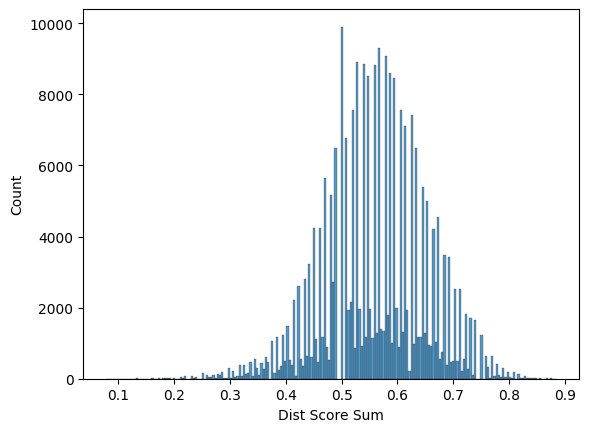

In [59]:
sns.histplot(leven_dist_df, x = "Dist Score Sum")

In [26]:
#top 0.1%
leven_dist_top1 = leven_dist_df.sort_values("Dist Score Sum")["Entry"][:len(leven_dist_df) // 100]
leven_dist_top1.to_csv("shortest_score_func_enrichment.csv", index=False)

In [13]:
import textdistance

In [18]:
def longest_subseq(str1, str2):
    subseq = textdistance.lcsseq(str1, str2)
    return (len(subseq), subseq)

In [19]:
IDRs["CAM5 Subseq Four"] = IDRs["Four"].apply(lambda x: longest_subseq(CAM5_reduced_seq_four, x))

In [21]:
IDRs["CAM5 Subseq Twelve"] = IDRs["Twelve"].apply(lambda x: longest_subseq(CAM5_reduced_seq_twelve, x))

In [25]:
IDRs["CAM5 Subseq Eighteen"] = IDRs["Eighteen"].apply(lambda x: longest_subseq(CAM5_reduced_seq_eighteen, x))

In [28]:
IDRs["CAM5 Subseq"] = IDRs["Sequence"].apply(lambda x: longest_subseq(CAM5_IDR, x))

In [34]:
IDRs[[x[0] == 25 for x in IDRs["CAM5 Subseq"]]].sort_values("CAM5 Hamming Eighteen")[["Entry", "Sequence", "CAM5 Hamming Eighteen", "CAM5 Subseq"]].drop_duplicates()[:20]

,Entry,Sequence,CAM5 Hamming Eighteen,CAM5 Subseq
82795,F4IVN6,MAKRRGKRVMAAKRSSNSAEYKEKNGRRKSHCRIL,"(0, DDPQFFNFDLJPLPNEQQPFRCQBA)","(25, AAKRSSNSAEYKEKNGRRKSHCRIL)"
177437,A0A654EWJ3,MMAKRRGKRVMAAKRSSNSAEYKEKNGRRKSHCRIL,"(0, DDPQFFNFDLJPLPNEQQPFRCQBA)","(25, AAKRSSNSAEYKEKNGRRKSHCRIL)"
87724,Q5XPK0,NPSKTDDIKVQRDQAHRKRKKKRLPQRNICRSNAVSTSDETNGAHL...,"(16, BGJQFFDLDBFPLPNAHLLFAHGJH)","(25, AAKRSSNSAEYKEKNGRRKSHCRIL)"
143189,A0A1P8B5K2,MSTWQLFPDSSGDGFRWEVAGRILQSVSDSTPTKALESTAPLPSMA...,"(17, BDPDPFBADLPBGJFMAQNGNCFBH)","(25, AAKRSSNSAEYKEKNGRRKSHCRIL)"
183585,A0A654FKI2,RWEVAGRILQSVSDSTPTKALESTAPLPSMADLLLQGCSKLIAREE...,"(17, BDPDPFBADLPBGJFMAQNGNCFBH)","(25, AAKRSSNSAEYKEKNGRRKSHCRIL)"
143194,A0A1P8B5L3,MSTWQLFPDSSGDGFRWEVAGRILQSVSDSTPTKALESTAPLPSMA...,"(17, BDPDPFBADLPBGJFMAQNGNCFBH)","(25, AAKRSSNSAEYKEKNGRRKSHCRIL)"
22682,F4JGU5,MSTWQLFPDSSGDGFRWEVAGRILQSVSDSTPTKALESTAPLPSMA...,"(17, BDPDPFBADLPBGJFMAQNGNCFBH)","(25, AAKRSSNSAEYKEKNGRRKSHCRIL)"
162202,A0A5S9XNQ9,MSTWQLFPDSSGDGFRWEVAGRILQSVSDSTPTKALESTAPLPSMA...,"(17, BDPDPFBADLPBGJFMAQNGNCFBH)","(25, AAKRSSNSAEYKEKNGRRKSHCRIL)"
180793,A0A654FAN0,VNLVCSECGEQRLSSCSCSDISPTRTVDAAVDAAVGENVVRISSLI...,"(17, BIPQFFFFCBLBNPQGPNRQIFQBE)","(25, AAKRSSNSAEYKEKNGRRKSHCRIL)"
118086,A0A178VH39,NLVCSECGEQRLSSCSCSDISPTRTSNAAVDTAVGENVVRISSLID...,"(17, BIPQFFFFCBLBNPQGPNRQIFQBE)","(25, AAKRSSNSAEYKEKNGRRKSHCRIL)"


In [ ]:
import Levenshtein

# Example usage:
distance = Levenshtein.distance("string1", "string2")


<Axes: ylabel='Count'>

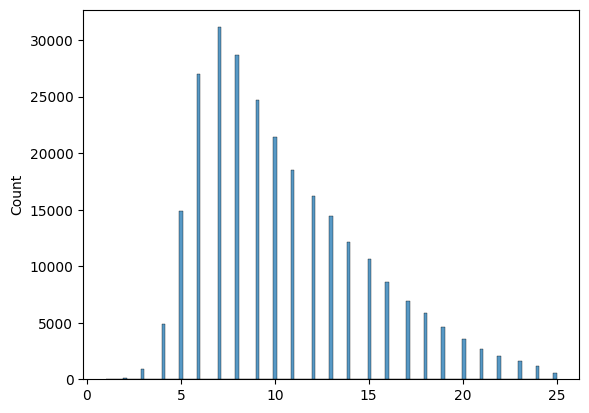

In [27]:
sns.histplot([x[0] for x in IDRs["CAM5 Subseq Eighteen"]])